<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gdown

In [2]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From: https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o
To: /content/data_no_temperature.csv
100%|██████████| 1.44M/1.44M [00:00<00:00, 39.1MB/s]
Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 42.3MB/s]


'data_temperature.csv'

# Correlazione tra frequenze e temperatura

In [10]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

In [12]:
correlation = df_temp.corr(numeric_only = True)["temperatura"].drop("temperatura")
print(correlation)

Mode 1    0.146577
Mode 2    0.141312
Mode 3   -0.632878
Mode 4   -0.407598
Mode 5   -0.082415
Mode 6   -0.186660
Name: temperatura, dtype: float64


Grafico a punti

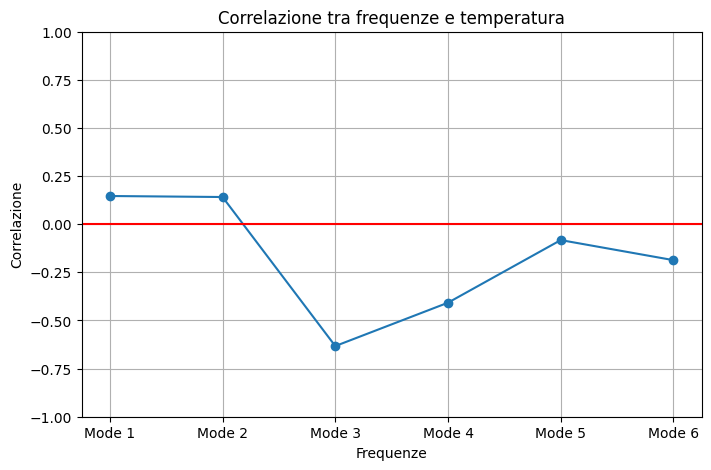

In [13]:
freq = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
Y = np.linspace(-1, 1, 9)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(freq, correlation, "o-")
ax.set_xticks(freq)
ax.set_yticks(Y)
ax.axhline(0, color="red")
ax.set_title("Correlazione tra frequenze e temperatura")
ax.set_xlabel("Frequenze")
ax.set_ylabel("Correlazione")
ax.grid(True)
plt.show()

Grafico a barre

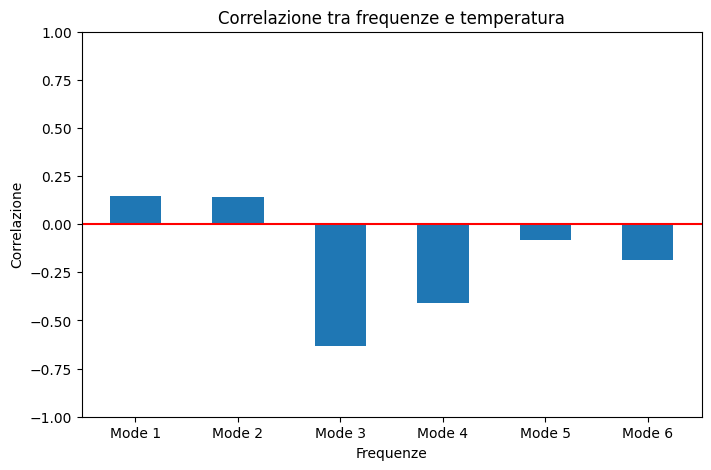

In [14]:
plt.figure(figsize=(8,5))
plt.ylim(-1 , 1)
plt.bar(correlation.index, correlation.values, width=0.5)
plt.axhline(0, color="red")
plt.ylabel("Correlazione")
plt.xlabel("Frequenze")
plt.title("Correlazione tra frequenze e temperatura")
plt.show()

Heatmap

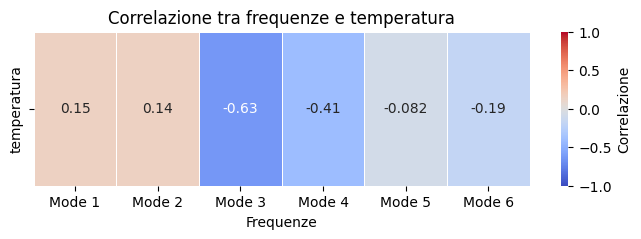

In [15]:
correlation = df_temp.corr(numeric_only = True)[["temperatura"]].drop("temperatura")

plt.figure(figsize=(8,2))
sns.heatmap(
    correlation.T,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    linewidth=0.5,
    cbar_kws={"label": "Correlazione"}
)
plt.title("Correlazione tra frequenze e temperatura")
plt.xlabel("Frequenze")
plt.ylabel("")
plt.show()